<a href="https://colab.research.google.com/github/mario-rot/ComputerVisionCourse-MAI/blob/main/Session%204/P4_Mario_Lauren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory #2_1 : Template Matching and HOG

At the end of this laboratory, you would get familiarized with

*   Normalized Correlation
*   Histogram of Oriented Gaussian

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Mount your drive to access the images.
*   Add sufficient comments and explanations wherever necessary.
---

In [1]:
%%shell
git clone https://github.com/mario-rot/ComputerVisionCourse-MAI.git
cd 'ComputerVisionCourse-MAI'
mv 'Session 4/images' /content/

Cloning into 'ComputerVisionCourse-MAI'...
remote: Enumerating objects: 11735, done.
remote: Counting objects: 100% (11735/11735), done.
remote: Compressing objects: 100% (11695/11695), done.
remote: Total 11735 (delta 65), reused 11686 (delta 32), pack-reused 0
Receiving objects: 100% (11735/11735), 20.54 MiB | 19.42 MiB/s, done.
Resolving deltas: 100% (65/65), done.
mv: cannot stat 'Session 4/notebook_images': No such file or directory


In [2]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches
import os
from skimage import color, data, exposure, feature, filters, io, transform 
from skimage.color import rgb2gray
from skimage.io import imread, imread_collection

In [3]:
# function to plot images using matplotlib subplots
def grid_images(imgs, rows=1, cols=1, titles=None, figsize = (10,10), axis=False, cmap=False):
  fig, axs = plt.subplots(rows, cols, figsize = figsize)
  if rows <= 1 or cols <= 1:
    for idx, img in enumerate(imgs):
      axs[idx].imshow(img, cmap=cmap)
      if axis:
        axs[idx].axis(axis)
      if titles:
        axs[idx].set_title(titles[idx])
  else:
    imgs = np.reshape(imgs, (rows, cols))
    for row in range(len(imgs)):
      for column in range(len(imgs[0])):
        axs[row][column].imshow(imgs[row][column], cmap=cmap)
        if axis:
          axs[row][column].axis(axis)
        if titles:
          axs[row][column].set_title(titles[row][column])

# function to plot images in a grid with a custom layout
def custom_grid(imgs, rows = 1, cols = 1, titles=None, order = None, figsize = (10,10), axis=False, cmap=False, addRect=False):
  fig = plt.figure(constrained_layout=True, figsize = figsize)
  if not order:
    order = [[i, [j,j+1]] for i in range(rows) for j in range(cols)]
  gs = GridSpec(rows, cols, figure=fig)
  for n,(i,j) in enumerate(zip(imgs,order)):
    im = fig.add_subplot(gs[j[0],j[1][0]:j[1][1]])
    if cmap:
      im.imshow(i, cmap=cmap)
    else:
      im.imshow(i)
    if axis:
      im.axis('off')
    if titles:
      im.set_title(titles[n])
    if addRect:
      rect_e = patches.Rectangle(addRect[n][0], addRect[n][3], addRect[n][2], linewidth=1, edgecolor='r', facecolor='none')
      rect_d = patches.Rectangle(addRect[n][1], addRect[n][3], addRect[n][2], linewidth=1, edgecolor='g', facecolor='none')
      im.add_patch(rect_e)
      im.add_patch(rect_d)


## Template Matching

### Exercise #1: Normalized correlation

*   Load 'einstein.png' image and use 'template.png' to find the location of the template using normalized cross-correlation. *Hint:match_template function is available in the skimage.feature module.*
*   Visualize the original image, template image and normalized cross-correlation image using matplotlib.

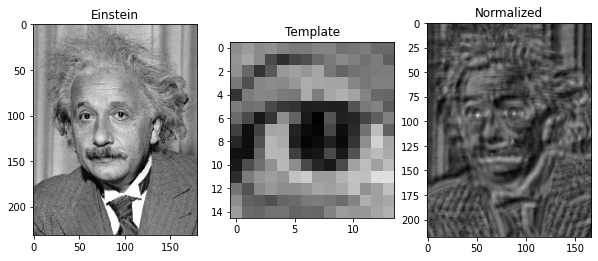

In [4]:
# solution
einstein = plt.imread('images/einstein.png')[:,:,:-1]
template = plt.imread('images/template.png')[:,:,:-1]

# use match_template function to perform normalized cross-correlation between the einstein image and the eye template
normalized = feature.match_template(einstein, template)

# display images
grid_images([einstein, template, np.squeeze(normalized)], 1,3, ['Einstein', 'Template', 'Normalized'], (10, 5), cmap = 'gray')

*   What is the output of the normalized cross-correlation function?

**Solution**

*The normalized cross-correlation function outputs an array of correlation coefficients between the image and the template at each given position. These values will all lie between -1 and 1, where locations with higher values represent greater similarity between the template and the image at those locations.*

The output of match_template function gives the response image with correlation coefficients. Let us visualize the exact location of the match:
*   Create a function to take the normalized cross-correlation image as input and return a bw image
    *   The function should convert the normalized cross-correlation image to a thresholded image.

In [5]:
# solution
def threshold_img(img, threshold):  
  img[img > threshold] = 255
  img[img < threshold] = 0
  return img

*   Visualize the thresholded image on top of the original image. Show the exact location of the match in red color.
*   *Hint: learn about alpha channels and listed colormaps in matplotlib*

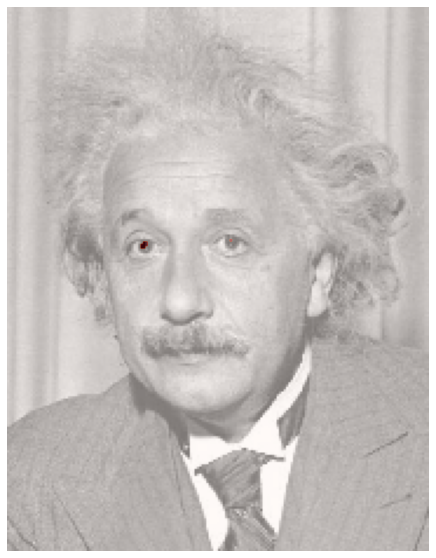

In [6]:
# solution
# perform normalized cross-correlation between einstein image and eye template
normalized = feature.match_template(einstein, template, True)

# show detections overlaid on top of einstein image
res = threshold_img(normalized[:,:,1] * 255, 131)
plt.figure(figsize = (10, 10))
plt.imshow(einstein)
plt.imshow(res, cmap='Reds', alpha=0.5)
_ = plt.axis('off')

### Exercise #2: Effect of contrast

*   Load 'einstein_br.png'
*   Perform template matching with the 'template.png' image
*   Visualize the original image, template image, normalized cross-correlation image and the thresholded image using matplotlib.

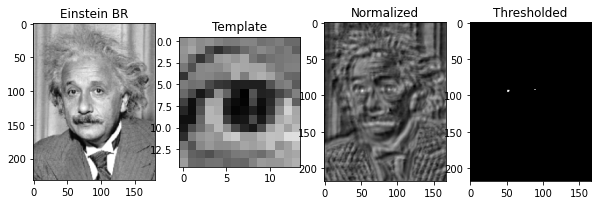

In [8]:
# solution

einstein_br = plt.imread('images/einstein_br.png')[:,:,:-1]

# perform template matching on einstein_br image
normalized_br = feature.match_template(einstein_br, template)

# apply threshold to best visualize detections
res = threshold_img(np.squeeze(normalized_br) * 255, 135)

# display images
grid_images([einstein_br, template, np.squeeze(normalized_br), res], 1,4, ['Einstein BR', 'Template', 'Normalized', 'Thresholded'], (10, 5), cmap = 'gray')

*   Repeat the above experiment with 'einstein_mask.png' image and visualize the results.

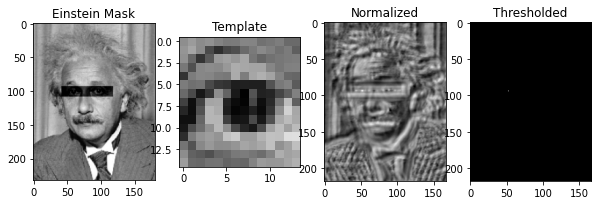

In [9]:
# solution
einstein_mask = plt.imread('images/einstein_mask.png')[:,:,:-1]

# perform template matching between einstein_mask and eye template
normalized_mask = feature.match_template(einstein_mask, template)

# apply threshold to best visualize detections
res = threshold_img(np.squeeze(normalized_mask) * 255, 135)

# display images
grid_images([einstein_mask, template, np.squeeze(normalized_mask), res], 1,4, ['Einstein Mask', 'Template', 'Normalized', 'Thresholded'], (10, 5), cmap = 'gray')

*   Do you find any differences in results with respect to contrast changes? 
*   Explain your inferences.

**Solution**

*The similarity of the results depends on the extent of the contrast changes. For example, with the einstein_br image, the result was almost the same as with the original Einstein image, since the illumination was very similar. However, when only the region around the eyes was darkened, template matching did not detect the match in the image.*

...

*   What happens if you change the contrast of the template image?
*   Use 'template_br.png' instead of 'template.png' and repeat the experiment with 'einstein.png'
*   Visualize the results.

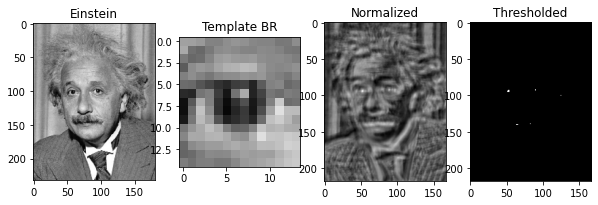

In [10]:
# solution
template_br = plt.imread('images/template_br.png')[:,:,:-1]

# perform template matching between einstain and brightened eye template
normalized_tempbr = feature.match_template(einstein, template_br)

# apply threshold to best visualize detections
res = threshold_img(np.squeeze(normalized_tempbr) * 255, 135)

# display images
grid_images([einstein, template_br, np.squeeze(normalized_tempbr), res], 1,4, ['Einstein', 'Template BR', 'Normalized', 'Thresholded'], (10, 5), cmap = 'gray')

**Solution**

*In this example, changing the contrast of the template while using the same threshold value resulted in more false detections than with the original template, although both the true detections were still present.*

...

**Exercise #3: Effect of rotation**

*   Load 'einstein.png' image and 'template.png' image.
*   Rotate the template by 10&deg;, 15&deg;, 20&deg; and perform template matching.
*   Visualize the original image, template image and the thresholded normalized cross-correlation image for all the different templates.
*   *Hint: rotate function is available in skimage.transform module*

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


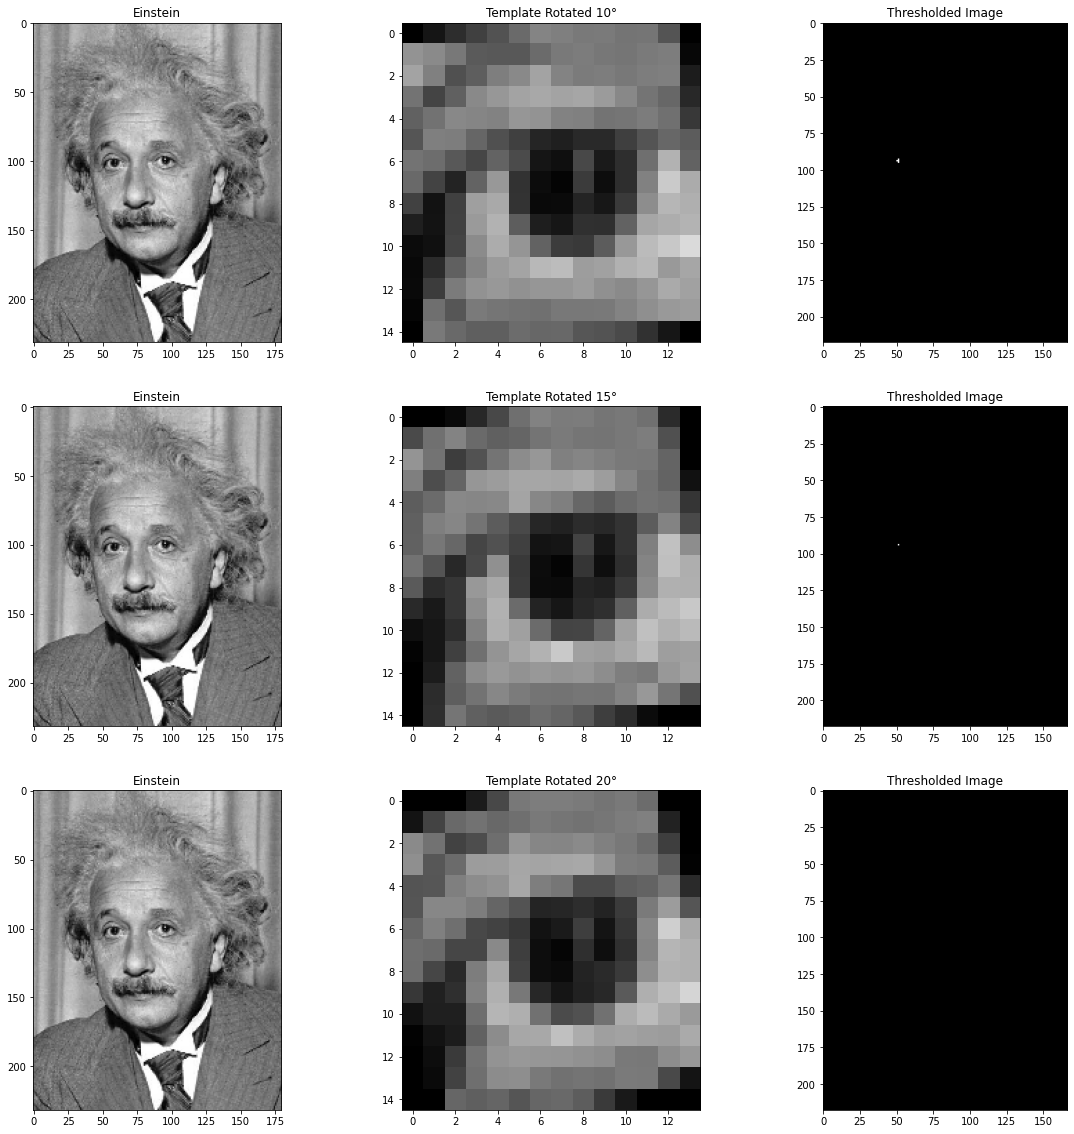

In [11]:
# solution

# apply rotates to template image
rot_10 = transform.rotate(template, 10)
rot_15 = transform.rotate(template, 15)
rot_20 = transform.rotate(template, 20)

# perform template matching using rotated templates against original einstein image
normalized_rot_10 = feature.match_template(einstein, rot_10)
normalized_rot_15 = feature.match_template(einstein, rot_15)
normalized_rot_20 = feature.match_template(einstein, rot_20)

# apply threshold to best visualize detections
res_10 = threshold_img(np.squeeze(normalized_rot_10) * 255, 135)
res_15 = threshold_img(np.squeeze(normalized_rot_15) * 255, 135)
res_20 = threshold_img(np.squeeze(normalized_rot_20) * 255, 135)

# display images
grid_images([[einstein, rot_10, res_10],[einstein, rot_15, res_15],[einstein, rot_20, res_20]], 3,3, [['Einstein', 'Template Rotated 10°', 'Thresholded Image'], ['Einstein', 'Template Rotated 15°', 'Thresholded Image'], ['Einstein', 'Template Rotated 20°', 'Thresholded Image']], (20, 20), cmap = 'gray')                        

*   What do you infer with respect to rotation?

**Solution**

*Template matching is less likely to be effective as the degree of rotation of the template is increased. For example, when the template is rotated by 10° and 15°, one match is still detected, whereas when the template is rotated by 20°, no matches are detected.*

...

## Histogram of Oriented Gaussians

### Exercise #1: HOG Image Visualization

*   Load 'astronaut' image from the data module.
*   Apply hog over the image with default parameters. *Hint: hog function is available in skimage.feature module.*
*   Visualize the original image and the hog_image using matplotlib


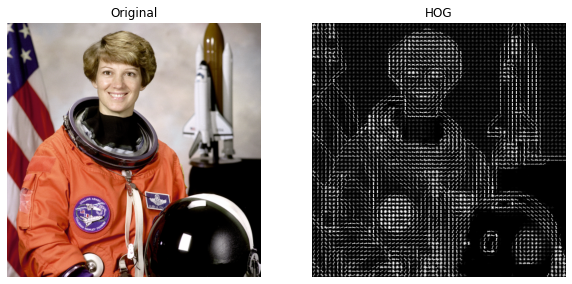

In [12]:
# solution
astronaut = data.astronaut()

# apply hog to astronaut image 
fd, astronaut_hog = feature.hog(astronaut, visualize=True)

# rescale hog image intensity to better visualize gradients
astro_hog_rescaled = exposure.rescale_intensity(astronaut_hog, in_range=(0, 10))

# display images
grid_images([astronaut, astro_hog_rescaled], 1, 2, ['Original', 'HOG'], (10,10), axis='off', cmap='gray')

*   Explain the algorithm behind HOG



**Solution**

* *Divide the image into a grid of cells*
* *Obtain the orientations of the pixel gradients within each cell*
* *Count occurences of the orientations in each cell, and divide them among a specified number of bins*
* *Normalize all the cells within each block using L2 normalization*
* *Repeat the above three steps with each block of cells, using a sliding scale method*
* *Return a feature vector and the image (if visualization parameter is specified)*

...

*   Is it necessary to do image pre-processing to normalize the color and gamma values before applying HoG?

**Solution**

*We do not need to normalize color and gamma values before applying HOG, because HOG already performs normalization within the algorithm. However, if the image were to be pre-processed, for example using gamma compression, it would help to reduce the effects of local changes in illumination.*

...

*   What do you infer from the parameters
    *   orientation
    *   pixels_per_cell


**Solution**

*The orientations parameter denotes the number of bins we want to divide our orientations into. The pixels_per_cell parameter denotes the size (number of pixels) in each cell.*

...

*   Change the value of orientation (try atleast 3 different values) and compare the hog_image using matplotlib subplot.

[0.20669674 0.12883334 0.01940919 ... 0.07015935 0.05152884 0.        ]


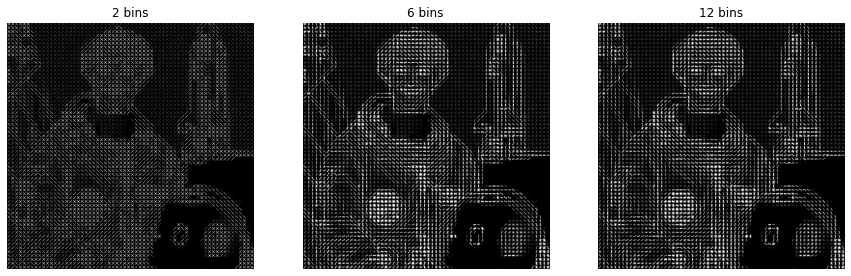

In [13]:
# solution

# apply hog to astronaut images using 2, 6, and 12 orientations, respectively
fd, astronaut_hog_2 = feature.hog(astronaut, orientations=2, visualize=True)
fd, astronaut_hog_6 = feature.hog(astronaut, orientations=6, visualize=True)
fd, astronaut_hog_12 = feature.hog(astronaut, orientations=12, visualize=True)

print(fd)

# rescale hog image intensity to better visualize gradients
bright_hog_2 = exposure.rescale_intensity(astronaut_hog_2, in_range=(0, 10))
bright_hog_6 = exposure.rescale_intensity(astronaut_hog_6, in_range=(0, 10))
bright_hog_12 = exposure.rescale_intensity(astronaut_hog_12, in_range=(0, 10))

grid_images([bright_hog_2, bright_hog_6, bright_hog_12], 1, 3, ['2 bins', '6 bins', '12 bins'], (15,15), axis='off', cmap='gray')


*   What is the role of block normalization in HoG?
*   What are the different methods available in block normalization fo skimage?

**Solution**

* *Block normalization reduces local variations in illumination and foreground-background contrast, which helps achieve invariance to changes in illumination and shadowing.*
* *The methods available for block normalization in skimage are L1, L1-sqrt, L2, and L2-Hys.*

...

*   The hog function in skimage returns feature descriptors and hog image. Explain each dimension of the feature descriptor output

**Solution**

*In our implementation, since we used the default parameter `feature_vector=True`, the feature descriptor the function returns is 1-dimensional, and it contains information about the edges.*

...

### Exercise #2: Pedestrian detection

*   Read the template ('person_template.png') and obtain its HOG descriptor (try different values for the parameters and get the optimal value)
*   Visualize the original image and the hog_image using matplotlib. 
*   Show different parameter selection steps also using matplotlib.
*   How did you select the optimal value?

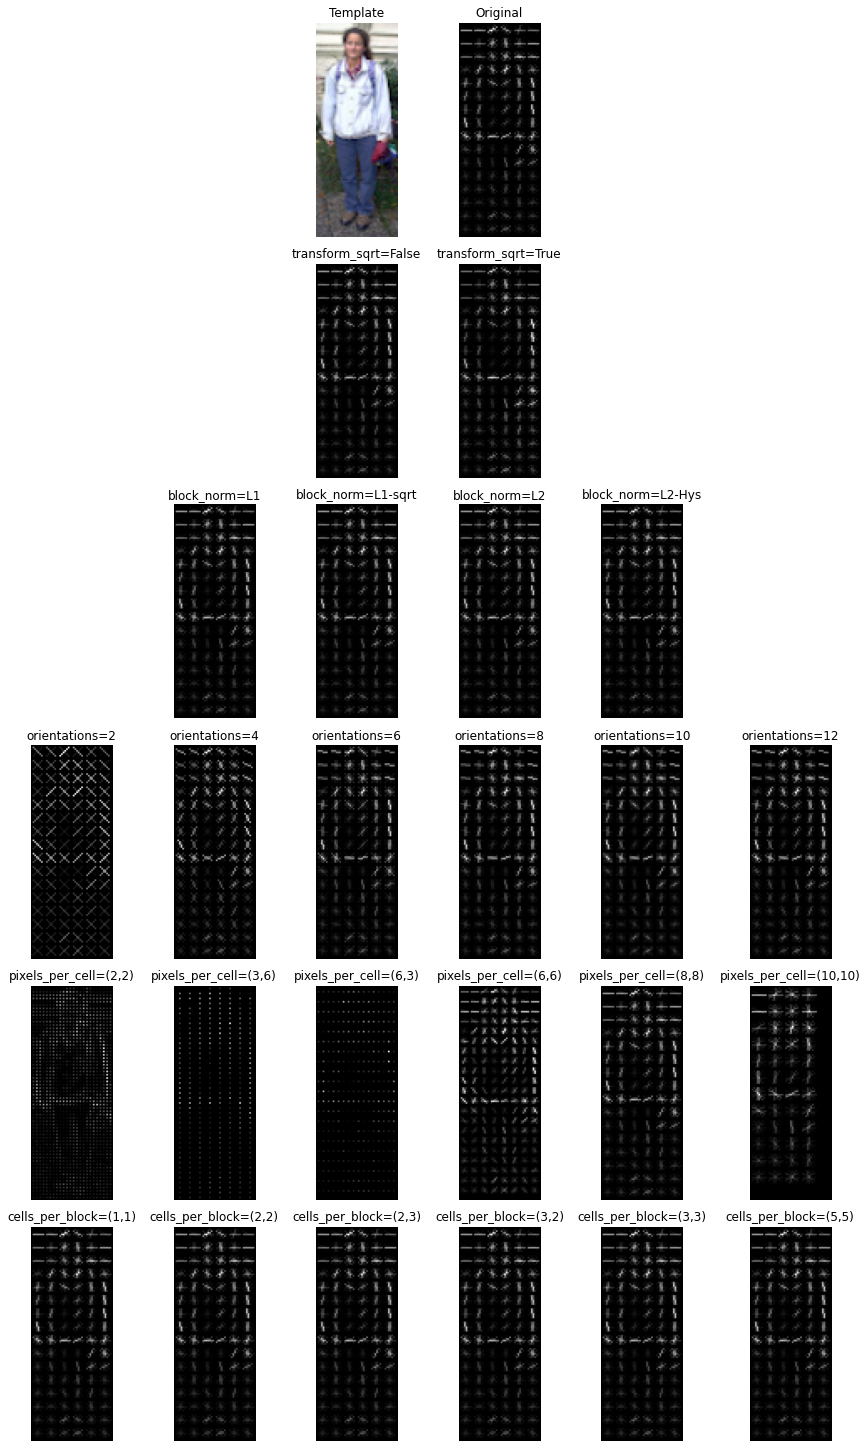

In [14]:
person_template = plt.imread('images/person_template.bmp')[:,:,:-1]

# hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), block_norm='L2-Hys', visualize=False, transform_sqrt=False, 
#     feature_vector=True, multichannel=None, *, channel_axis=None)

_, person_template_hog = feature.hog(person_template,  visualize=True)

# Experimenting with diferent amounts of orientation bins.
_, pthO1 = feature.hog(person_template, orientations=2, visualize=True)
_, pthO2 = feature.hog(person_template, orientations=4, visualize=True)
_, pthO3 = feature.hog(person_template, orientations=6, visualize=True)
_, pthO4 = feature.hog(person_template, orientations=8, visualize=True)
_, pthO5 = feature.hog(person_template, orientations=10, visualize=True)
_, pthO6 = feature.hog(person_template, orientations=12, visualize=True)

# Experimenting with diferent amounts of orientation bins.
_, pthPC1 = feature.hog(person_template, pixels_per_cell=(2, 2), visualize=True)
_, pthPC2 = feature.hog(person_template, pixels_per_cell=(3, 6), visualize=True)
_, pthPC3 = feature.hog(person_template, pixels_per_cell=(6,3), visualize=True)
_, pthPC4 = feature.hog(person_template, pixels_per_cell=(6, 6), visualize=True)
_, pthPC5 = feature.hog(person_template, pixels_per_cell=(8, 8), visualize=True)
_, pthPC6 = feature.hog(person_template, pixels_per_cell=(10, 10), visualize=True)

# Experimenting with diferent amounts of orientation bins.
_, pthBN1 = feature.hog(person_template, block_norm='L1', visualize=True)
_, pthBN2 = feature.hog(person_template, block_norm='L1-sqrt', visualize=True)
_, pthBN3 = feature.hog(person_template, block_norm='L2', visualize=True)
_, pthBN4 = feature.hog(person_template, block_norm='L2-Hys', visualize=True)


# Experimenting with diferent amounts of orientation bins.
_, pthCB1 = feature.hog(person_template, cells_per_block=(1,1), visualize=True)
_, pthCB2 = feature.hog(person_template, cells_per_block=(2,2), visualize=True)
_, pthCB3 = feature.hog(person_template, cells_per_block=(2,3), visualize=True)
_, pthCB4 = feature.hog(person_template, cells_per_block=(3,2), visualize=True)
_, pthCB5 = feature.hog(person_template, cells_per_block=(3,3), visualize=True)
_, pthCB6 = feature.hog(person_template, cells_per_block=(5,5), visualize=True)


# Experimenting with diferent amounts of orientation bins.
_, pthT1 = feature.hog(person_template, transform_sqrt=False, visualize=True)
_, pthT2 = feature.hog(person_template, transform_sqrt=True, visualize=True)


imgs = [person_template, person_template_hog, 
        pthO1,pthO2,pthO3,pthO4,pthO5,pthO6,
        pthPC1,pthPC2,pthPC3,pthPC4,pthPC5,pthPC6,
        pthBN1,pthBN2,pthBN3,pthBN4,
        pthCB1,pthCB2,pthCB3,pthCB4,pthCB5,pthCB6,
        pthT1,pthT2]

titles =  ['Template', 'Original', 
          'orientations=2','orientations=4','orientations=6','orientations=8','orientations=10','orientations=12',
          'pixels_per_cell=(2,2)','pixels_per_cell=(3,6)','pixels_per_cell=(6,3)','pixels_per_cell=(6,6)','pixels_per_cell=(8,8)','pixels_per_cell=(10,10)',
          'block_norm=L1','block_norm=L1-sqrt','block_norm=L2','block_norm=L2-Hys',
          'cells_per_block=(1,1)','cells_per_block=(2,2)','cells_per_block=(2,3)','cells_per_block=(3,2)','cells_per_block=(3,3)','cells_per_block=(5,5)',
          'transform_sqrt=False','transform_sqrt=True']

order = [[0,[2,3]],[0,[3,4]],
         [3,[0,1]],[3,[1,2]],[3,[2,3]],[3,[3,4]],[3,[4,5]],[3,[5,6]],
         [4,[0,1]],[4,[1,2]],[4,[2,3]],[4,[3,4]],[4,[4,5]],[4,[5,6]],
         [2,[1,2]],[2,[2,3]],[2,[3,4]],[2,[4,5]],
         [5,[0,1]],[5,[1,2]],[5,[2,3]],[5,[3,4]],[5,[4,5]],[5,[5,6]],
         [1,[2,3]],[1,[3,4]],   
]

custom_grid(imgs, 6,6, titles = titles, order=order, axis='off', figsize=(12,20), cmap='gray')


**Solution**
* `transform_sqrt`: *no significant visual changes are observed between True and False values*
* `block_norm`: *all four normalization techniques achieve almost the same result*
* `orientations`: *this parameter is important to creating a good HOG image. In this example, having greater than 4 orientations shows more information than having just 2 orientations, but the most optimal value we found here is 4 orientations, since it shows the same amount of information as with a greater number of orientations, but is less computationally complex*
* `pixels_per_cell`: *In this example, a value of (6, 6) produces the most descriptive HOG image*
* `cells_per_block`: *In this example, cells_per_block has no discernible impact on the information visualized in the image*

*See below for image applying these optimal values*

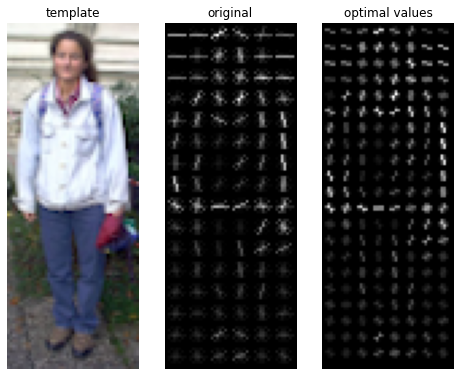

In [15]:
# solution


# create hog of template with default values
fd, person_template_hog = feature.hog(person_template,  visualize=True)

# create hog of template with optimal values
fd1, pth1 = feature.hog(person_template, orientations=4, pixels_per_cell=(6, 6), cells_per_block=(3,3), block_norm='L2-Hys', visualize=True, transform_sqrt=False, feature_vector=True)

# display images
grid_images([person_template, person_template_hog, pth1], 1, 3, ['template', 'original', 'optimal values'], (8,8), axis='off', cmap='gray')


*   Read the folder 'pedestrians' from the images folder.
*   For each image, apply sliding window, to get the hog descriptors (Use a step size of 5 pixels for the sliding window)
*   Use euclidean distance and dot product to compare the descriptors
*   Visualize the location of the image that is most similar to the person_template using both the metrics in a matplotlib subplot*


In [16]:
# define a function to perform a sliding window over an image
# returns the cropped image from within each window, and the list of window coordinates
def sliding_window(img, size, step=5):
  img_crops = []
  window_list = []
  window = [[0,size[0]],[0,size[1]]]
  window_list.append([[0,size[0]],[0,size[1]]])
  num_steps_r = round(( (img.shape[0] - size[0]) / step ) + 1)
  num_steps_c = round(( (img.shape[1] - size[1]) / step ) + 1)
  for r in range(num_steps_r):
    if r != 0:
      window[0][0] += step
      window[0][1] += step
    window[1][0] = 0
    window[1][1] = size[1]
    for c in range(num_steps_c):
      img_crops.append(img[window[0][0]:window[0][1], window[1][0]:window[1][1]])
      if c != 0:
        window[1][0] += step
        window[1][1] += step
      window_list.append([[window[0][0], window[0][1]], [window[1][0], window[1][1]]])
  return np.array(img_crops), window_list

In [17]:
# define a function to find the euclidean and dot product distances between the template and each sliding window of an image
# returns the index of the window with the minimum euclidean distance between the template and the sliding window,
# the index of the window with the minimum dot product between the template and the sliding window,
# a list containing all the sliding window images, and
# the coordinates of each window

def compare_descriptors(template, img):
  euclidian_values = []
  dot_values = []
  windows, window_vals = sliding_window(img, template.shape)
  template_hog = feature.hog(template)
  for w in windows:
    w_hog = feature.hog(w)
    euclidian_values.append(np.linalg.norm(template - w))
    #dot_values.append(np.dot(w_hog[:,np.newaxis], template_hog[np.newaxis,:]))
    dot_values.append(np.dot(w_hog, template_hog))
  min_euclidian = np.array(euclidian_values).argmin()
  min_dot = np.array(dot_values).argmin()

  return min_euclidian, min_dot, windows, window_vals

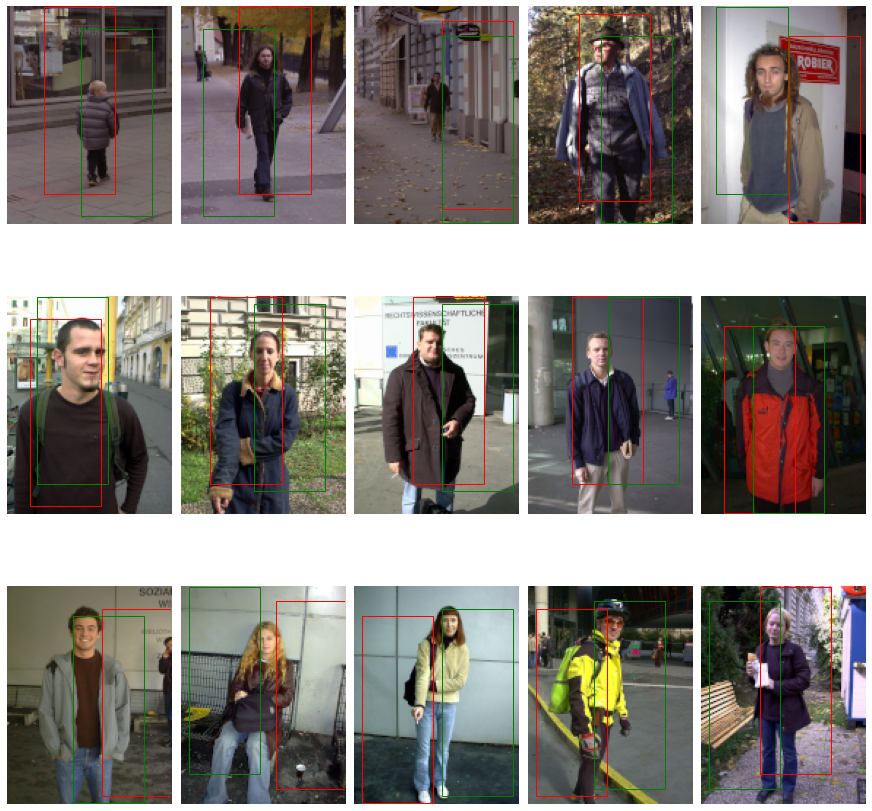

In [18]:
# read all images in from pedestrians folder
folder_path = 'images/pedestrians/*.bmp'
collection = imread_collection(folder_path)

# perform description comparison between each image and the template
# save results to win_vals to plot rectangles over images to indicate detection
min_eucs = []
min_dots = []
win_vals = []
for img in collection:
  comparison = compare_descriptors(person_template, img)
  min_eucs.append(comparison[0])
  min_dots.append(comparison[1])
  win_vals.append([[comparison[3][comparison[0]][1][0], comparison[3][comparison[0]][0][0]], [comparison[3][comparison[1]][1][0], comparison[3][comparison[1]][0][0]],person_template.shape[0],person_template.shape[1]])

# display images and detections
# green rectangles represent dot product detections
# red rectangles represent euclidean distance detections
custom_grid(collection, 3, 5, axis='off', figsize=(12,12), addRect=win_vals)

*   Count the failures and discuss the possible reason for failure for each image.

**Solution**
* *Image 1: successful match - however, detection is not centered, since the size of the template does not exactly match the size of the pedestrian in the image*
* *Image 2: successful match - Euclidean distance performs better than dot product*
* *Image 3: failed match - however, both techniques provide similar results. This may be due to a difference in illumination between the image and the template. In addition, the subject in the image is very small in comparison to the subject in the template.*
* *Image 4: partial match - Euclidean distance provided a successful match. However, dot product provided a slightly different match, likely due to differences in illumination within the image itself*
* *Image 5: partial match - dot product provided a successful match. However, Euclidean distance provided a slightly different match, likely due to the fact that the pedestrian in the image is cropped and only displayed from the waist up*
* *Image 6: successful match - likely due to similar illumination to that of the template, in addition to similar orientation of the pedestrian*

* *Image 7: successful match - however, detection is not centered, likely due in part to background noise and changes in illumination*
* *Image 8: partial match - Euclidean distance was successful in finding a match. However, dot product failed, perhaps due to body position and posture*
* *Image 9: partial match - Euclidean distance was successful in detecting the match. However, dot product failed, likely to detecting two pedestrian-like figures within the same frame*
* *Image 10: successful match - both methods successfully detected the pedestrian, likely because the pedestrian is oriented in the same way as the pedestrian in the template and has high contrast against the background*
* *Image 11: partial match - Dot product was successful in detecting the pedestrian, but Euclidean distance failed, likely due to detecting two pedestrian-like figures in the same window*
* *Image 12: failed match - both methods failed to detect the person, likely due to the seated posture and folded arms, neither of which are present in the template image*
* *Image 13: failed match - both methods failed to detect the pedestrian, likely due to the low contrast between the person and the background, and because the posture differs from that of the person in the template, since one arm is crossed*
* *Image 14: partial match - dot product was successful in detecting the pedestrian, however, Euclidean distance failed, likely because the subject's body is turned*
* *Image 15: successful match - both methods are successful in detecting at least half of the subject's body*

...

*   What is the failure rate for dot product and what is the failure rate for euclidean distance?

**Solution**

* *Euclidean distance*
  * *Succesful:* 9 out of 15
  * *Fails:* 6 out of 15

* *Dot product*
  * *Succesful:* 9 out of 15 
  * *Fails:* 6 out of 15


...

*   What is the difference between using dot product and euclidean distance?

**Solution**

*Euclidean distance and dot product are two different mathematical methods of calculating the distance between two feature vectors from HOG. In the result of our sliding window analysis, we can see that each of these two methods provides different detections each time. Both had the same rate of success, but Euclidean appeared to be more precise with its placement of the pedestrian within the given window.*

...

*   Compare template matching and HOG. 
*   What are the advantages of HOG over template matching algorithm.

**Solution**

* *Template matching compares a given template directly to the raw pixels of a query image. On the other hand, HOG calculates the gradient at each given pixel, which gives more relevant information about changes across the image. The two methods are similar in that they both can use varying distance measures to determine final similarity between a template and the query image, though template matching uses measures such as sum square difference and normalized cross correlation, whereas HOG uses Euclidean distance and dot product, since it is comparing vectors.*

* *Compared to HOG, template matching is more sensitive to rotations, changes in illumination and size, and variance between the template and the query image. By just looking at the gradients rather than the raw pixels of the image, HOG is better able to manage these variations and provide better detections.*

...


---

## **End of L2_1: Template Matching and HOG**
Deadline for L2_1 submission in CampusVirtual is: **Thursday, the 20th of October, 2022**
